In [8]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

1555515


In [9]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [10]:
import ImageAnalysis3 as ia3

In [11]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [12]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500',
             'shared_parameters':{
                     'single_im_size':[30, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 1000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/
-- 16 folders, 466 fovs detected.


In [13]:
_overwrite = False

_save_images = True

_warp_image = False
_fit_spots = True


#sel_fov_ids = np.concatenate([np.arange(81, 168), np.arange(18, 20)]) # batch1+2 in mendel
sel_fov_ids = np.arange(0,40)
# 0-9: processed not warpped.
# 10-19: warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    fov._save_to_file('merfish')
    fov._save_to_file('rna')
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('merfish')

    # 3. Process RNA-spots as reference
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('rna')
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im', 'rna_ref_im'] in 9.687s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
Reference channel: 637
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from fi

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'merfish_ref_im', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rna_ref_im', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 16.547s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
--- merfish attributes updated:[] in 0.162s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
--- rna attributes updated:[] in 0.011s.
directly return existing attribute.
-- folders not selected, allow processing all 16 folder

-- checking merfish, region:[16 17 18] in 0.020s.
-- checking merfish, region:[19 20 21] in 0.018s.
- No merfish images and spots requires processing, skip.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_004.hdf5
--- merfish attributes updated:[] in 0.012s.
-- folders not selected, allow processing all 16 folders
-- checking rna, region:[1] in 0.284s.
-- checking rna, region:[99 98 97] in 0.018s.
-- checking rna, region:[102 101 100] in 0.092s.
-- checking rna, region:[105 104 103] in 0.020s.
-- checking rna, region:[108 107 106] in 0.054s.
-- checking rna, region:[111 110 109] in 0.018s.
-- checking rna, region:[114 113 112] in 0.064s.
-- checking rna, region:[117 116 115] in 0.020s.
- No rna images and spots requires processing, skip.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_004.hdf5
--- rna attributes updated:[] in 0.012s.
Get Folder Names: (i

++ base attributes saved:['merfish_ref_im'] in 1.540s.
-- checking merfish, region:[52 53] in 0.051s.
-- checking merfish, region:[1 2 3] in 0.012s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.010s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_005.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_005.hdf5 in 0.455s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_0

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.31  36.87 -39.35] in 0.000s
in 8.648s
-- illumination correction for channels: 748,  in 32.757s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 59.101s
637, in 10.692s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, 477, in 5.246s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ -0.07  41.7  -49.41] in 1.985s.
 in 40.184s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.07  41.66 -49.52] in 2.840s.
in 10.161s
-- illumination correction for channels: 748, in 11.854s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ -0.95  42.31 -49.6 ] in 2.226s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.36  41.89 -49.51] in 7.090s
-- generate translation function

-- updated spots for id:[7, 8, 9] in 0.034s
1000 fitted in 332.283s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[4, 5, 6] in 0.056s
1000 fitted in 297.345s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[16, 17, 18] in 0.040s
1000 fitted in 311.474s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[13, 14, 15] in 0.030s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 291.209s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[19, 20, 21] in 0.026s
, finish in 874.53s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.259s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_005.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_005.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_005.dax  in 1.139s
-- removing hot pixels for channels:['4

545, 477, -- drift 1: [-7.0000e-02 -6.5230e+01  2.6953e+02] in 2.264s.
in 6.058s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ -1.14 -63.72 269.47] in 2.204s.
-- drift 0: [-6.0000e-02 -6.5800e+01  2.6712e+02] in 2.513s.
-- drift 3: [ 5.0000e-02 -6.4300e+01  2.7014e+02] in 2.804s.
--- drifts for crops:[0 1 3] pass the thresold, exit cycle.
--- finish drift: [-2.0000e-02 -6.4920e+01  2.6979e+02] in 9.540s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-2.0000e-02 -6.4920e+01  2.6979e+02] in 0.001s
in 9.767s
-- illumination correction for channels: 748, -- finish correction in 51.353s
637, -- drift 1: [-7.0000e-02 -6.5830e+01  2.6691e+02] in 3.320s.
- loading rna info from file:Conv_zscan_005.hdf5  in 41.378s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 11.650s
-- bleedthrough correction for channels: ['748', '637', '545'] in 0.731s

-- start fitting spots in channel:637, 999 fitted in 278.745s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[1] in 0.608s
6 seeded with th=1000.0, 6 fitted in 210.089s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 215.506s.
-- start fitting spots in channel:637, 12 seeded with th=1000.0, 12 fitted in 188.590s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 seeded with th=1000.0, 7 seeded with th=1000.0, 8 fitted in 193.048s.
-- start fitting spots in channel:545, 8 fitted in 192.341s.
-- start fitting spots in channel:545, 7 fitted in 191.113s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 185.546s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 183.081s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 182.478s.
-- start fitting spots in channe

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 346.953s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[99, 98, 97] in 0.078s
1000 fitted in 307.129s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[111, 110, 109] in 0.055s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 328.462s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
1000 fitted in 330.541s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[108, 107, 106] in 0.055s
1000 fitted in 338.253s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[105, 104, 103] in 0.038s
1000 fitted in 297.546s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[114, 113, 112] in 0.034s
1000 fitted in 284.497s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[

-- removing hot pixels for channels:['477'] in 2.610s
-- illumination correction for channels: 477, in 1.357s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.502s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.590s.
-- checking merfish, region:[52 53] in 0.057s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.013s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.013s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.012s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzhen

--- finish drift: [-2.000e-02  3.004e+01 -3.122e+01] in 8.121s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-2.000e-02  3.004e+01 -3.122e+01] in 0.001s
-- finish correction in 57.120s
-- drift 2: [ 1.000e-02  3.686e+01 -3.984e+01] in 3.295s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.    36.76 -39.74] in 8.995s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.    36.76 -39.74] in 0.000s
in 9.746s
-- illumination correction for channels: 748, -- finish correction in 44.853s
637,  in 44.805s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, 477, in 11.215s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.360s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [  0.    42.15 -49.09] in 2.056s.
-- drift 1: [  0.05  42.02 -49

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[4, 5, 6] in 0.049s
1000 fitted in 298.690s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[1, 2, 3] in 0.052s
1000 fitted in 276.997s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[13, 14, 15] in 0.052s
1000 fitted in 304.362s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[7, 8, 9] in 0.041s
1000 fitted in 295.017s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[10, 11, 12] in 0.047s
1000

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 270.797s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[19, 20, 21] in 0.025s
, finish in 843.12s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.257s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_006.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_006.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_006.dax  in 1.157s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_006.dax -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_006.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_006.dax -- drift 0: [-5.0000e-02 -6.5190e+01  2.6926e+02] in 2.058s.
 in 25.509s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ 1.2000e-01 -6.5420e+01  2.6939e+02] in 2.021s.
-- drift 2: [ 2.0000e-02 -6.4340e+01  2.6934e+02] in 1.998s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 3.0000e-02 -6.4980e+01  2.6933e+02] in 6.113s
-- generate translation function for chromat

-- start fitting spots in channel:637, 2 fitted in 219.169s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 220.034s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 199.924s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 207.244s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 192.857s.
-- start fitting spots in channel:545, 5 fitted in 183.362s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 5 seeded with th=1000.0, 12 fitted in 184.536s.
-- start fitting spots in channel:545, 5 fitted in 192.672s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 181.819s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 184.009s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 189.827s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seede

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_007.dax  in 8.722s
-- removing hot pixels for channels:['405'] in 2.721s
-- illumination correction for channels: 405, in 1.346s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.110s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
++ base attributes saved:['dapi_im'] in 1.484s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_007.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_007.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_40

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [  0.42  30.89 -32.4 ] in 2.099s.
- loading merfish info from file:Conv_zscan_007.hdf5 -- drift 2: [  0.11  30.82 -32.35] in 2.121s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.46  30.62 -32.24] in 6.622s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.46  30.62 -32.24] in 0.000s
 in 28.886s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.833s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_007.dax
-- 

-- start fitting spots in channel:637, 81 seeded with th=1000.0, 42 fitted in 212.771s.
-- start fitting spots in channel:637, 81 fitted in 215.730s.
-- start fitting spots in channel:637, 272 seeded with th=1000.0, 272 fitted in 238.482s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[52, 53] in 0.468s
110 seeded with th=1000.0, 84 seeded with th=1000.0, 18 seeded with th=1000.0, 84 fitted in 214.132s.
-- start fitting spots in channel:545, 110 fitted in 219.232s.
-- start fitting spots in channel:545, 18 fitted in 205.457s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 197.097s.
-- start fitting spots in channel:545, 47 seeded with th=1000.0, 47 fitted in 202.813s.
-- start fitting spots in channel:545, 48 seeded with th=1000.0, 35 seeded with th=1000.0, 48 fitted in 204.654s.
-- start fitting spots in channel:545, 35 fitted in 199.545s.
-- sta

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 329.583s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[4, 5, 6] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 349.063s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[7, 8, 9] in 0.052s
999 fitted in 321.265s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[10, 11, 12] in 0.043s
1000 fitted in 349.294s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[13, 14, 15] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 372.693s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[1, 2, 3] in 0.046s
1000 fitted in 322.877s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[16, 17, 18] in 0.033s
1000 fitted in 337.851s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[19, 20, 21] in 0.028s
, finish in 893.81s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.314s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_0

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_007.dax -- drift 2: [0. 0. 0.] in 1.893s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.694s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
 in 20.472s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 32.196s
in 14.730s
-- bleedthrough correction for channels: ['748', '637', '545']  in 21.025s
-- removing hot pixels for channels:['748', '637', '545', '477']  in 16.171s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 11.081s
-- illumination correction for channels: 748, 637, in 33.333s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.815s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, in 21.949s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, - 

-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 9.140s
-- start fitting spots in channel:748, 903 seeded with th=1000.0, 21 seeded with th=1000.0, 21 fitted in 207.743s.
-- start fitting spots in channel:637, 903 fitted in 240.568s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[1] in 0.593s
9 seeded with th=1000.0, 9 fitted in 201.078s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 27 seeded with th=1000.0, 10 fitted in 220.159s.
-- start fitting spots in channel:637, 27 fitted in 207.302s.
-- start fitting spots in channel:637, 11 seeded with th=1000.0, 11 fitted in 208.948s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 6 seeded with th=1000.0, 7 fitted in 225.484s.
-- start fitting spots in channel:637, 6 fitted in 210.207s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 185.211s.
-- sta

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 348.970s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[111, 110, 109] in 0.052s
1000 fitted in 401.580s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[105, 104, 103] in 0.055s
1000 fitted in 359.950s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[114, 113, 112] in 0.057s
1000 fitted in 383.369s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[99, 98, 97] in 0.055s
1000 fitted in 381.332s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[108

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_008.dax  in 1.161s
-- removing hot pixels for channels:['477'] in 2.609s
-- illumination correction for channels: 477, in 1.330s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.403s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.443s.
-- checking merfish, region:[52 53] in 0.054s.
-- checking merfish, region:[1 2 3] in 0.012s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.012s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 2.000e-02  2.896e+01 -3.330e+01] in 7.189s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 2.000e-02  2.896e+01 -3.330e+01] in 0.000s
637, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.434s
-- start fitting spots in channel:748, -- finish correction in 42.617s
in 11.082s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, in 8.938s
-- illumination correction for channels: 748, 477, 637, in 5.793s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
545, 477, -- drift 0: [ -0.19  35.73 -40.32] in 2.100s.
in 5.660s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
 in 18.793s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.07  35.7  -40.36] in 2.821s.
in 8.689s
-- illuminati

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 309.606s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[1, 2, 3] in 0.047s
1000 fitted in 310.501s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[4, 5, 6] in 0.049s
1000 fitted in 298.662s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[10, 11, 12] in 0.057s
999 fitted in 287.075s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s
1000 fitted in 310.749s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 309.381s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[19, 20, 21] in 0.029s
, finish in 846.30s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.277s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_008.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_008.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_008.dax  in 1.097s
-- removing hot pixels for channels:['4

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_008.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_008.dax in 5.702s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.993s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-1.1000e-01 -6.5110e+01  2.6801e+02] in 2.035s.
in 8.812s
-- illumination correction for channels: 748, 637, -- drift 1: [ 2.0000e-01 -6.5270e+01  2.6798e+02] in 2.015s.
545, -- drift 2: [  0.   -64.15 268.05] in 1.896s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 3.0000e-02 -6.4840e+01  2.6801e+02] in 5.979s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 3.0000e-02 -6.4840e+01  2.6801e+02] in 0.000s
477, -- finish correction in 39.345s
in 

-- start fitting spots in channel:637, 11 seeded with th=1000.0, 11 fitted in 226.096s.
-- start fitting spots in channel:637, 28 seeded with th=1000.0, 28 fitted in 188.468s.
-- start fitting spots in channel:545, 29 seeded with th=1000.0, 29 fitted in 189.232s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 189.401s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 190.037s.
-- start fitting spots in channel:545, 5 fitted in 184.431s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 181.928s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 182.725s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 332.604s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[102, 101, 100] in 0.053s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 310.122s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[111, 110, 109] in 0.052s
1000 fitted in 353.021s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[99, 98, 97] in 0.119s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 339.353s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[105, 104, 103] in 0.045s
1000 fitted in 322.043s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[108, 107, 106] in 0.048s
1000 fitted in 329.872s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[114, 113, 112] in 0.033s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 301.168s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[117, 116, 115] in 0.028s
, finish in 850.69s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.308s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_009.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_009.hdf5 in 0.610s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_009.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_009.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_009.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_009.hdf5  in 1.362s
-- removing hot pixels for channels:['748

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.713s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ 2.000e-02  3.669e+01 -3.790e+01] in 3.779s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.04  36.63 -37.9 ] in 8.487s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.04  36.63 -37.9 ] in 0.000s
-- drift 0: [ -0.08  41.36 -47.95] in 2.783s.
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.403s
-- start fitting spots in channel:748, -- finish correction in 47.016s
-- drift 1: [-2.000e-02  4.132e+01 -4.796e+01] in 4.926s.
in 9.050s
-- illumination correction for channels: 748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
637,  in 21.988s
-- removing hot pixels for channels:['748', '637', '545', '477']

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 298.953s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[1, 2, 3] in 0.040s
1000 fitted in 277.828s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[13, 14, 15] in 0.041s
1000 fitted in 309.865s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[4, 5, 6] in 0.056s
1000 fitted in 265.474s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[16, 17, 18] in 0.042s
1000 fitted in 270.549s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [0. 0. 0.] in 1.987s.
in 9.166s
-- illumination correction for channels: 748, - loading rna info from file:Conv_zscan_009.hdf5  in 19.498s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, in 0.728s.
- loading rna info from file:Conv_zscan_009.hdf5 -- drift 2: [0. 0. 0.] in 1.927s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.976s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_009.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_

--- finish drift: [ 8.0000e-02 -6.5800e+01  2.6838e+02] in 27.448s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 8.0000e-02 -6.5800e+01  2.6838e+02] in 0.001s
-- finish correction in 90.544s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.288s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.849s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 5 seeded with th=1000.0, 12 seeded with th=1000.0, 5 fitted in 203.069s.
-- start fitting spots in channel:637, 12 fitted in 220.947s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 222.976s.
-- start fitting spots in channel:637, 20 seeded with th=1000.0, 5 seeded with th=1000.0, 20 fitted in 223.091s.
-- start fitting spots i

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 304.178s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[99, 98, 97] in 0.054s
1000 fitted in 316.487s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[105, 104, 103] in 0.052s
1000 fitted in 314.260s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[102, 101, 100] in 0.052s
1000 fitted in 295.650s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[111, 110, 109] in 0.043s
1000 fitted in 303.454s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[108

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 275.519s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[114, 113, 112] in 0.035s
1000 fitted in 280.353s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[117, 116, 115] in 0.024s
, finish in 821.88s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.309s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed 

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_010.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_010.hdf5 in 0.440s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_010.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_010.dax  in 1.358s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ -0.11  34.69 -39.55] in 3.251s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.08  34.59 -39.43] in 8.773s
-- drift 0: [ -0.07  39.54 -49.55] in 2.420s.
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.08  34.59 -39.43] in 0.001s
in 10.021s
-- illumination correction for channels: 748, -- finish correction in 45.746s
637, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
 in 16.215s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 1: [  0.05  39.56 -49.73] in 4.369s.
477, in 5.838s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.533s
- wri

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 366.151s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[1, 2, 3] in 0.069s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 333.793s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[16, 17, 18] in 0.045s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 357.003s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[13, 14, 15] in 0.045s
999 fitted in 397.663s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[4, 5, 6] in 0.047s
1000 fitted in 346.998s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[19, 20, 21] in 0.045s
1000 fitted in 376.411s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[10, 11, 12] in 0.032s
1000 fitted in 398.538s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for 

-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_010.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_010.dax -- finish correction in 32.324s
in 0.725s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_010.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1

-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.928s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 6 seeded with th=1000.0, 29 seeded with th=1000.0, 6 fitted in 222.288s.
-- start fitting spots in channel:637, 29 fitted in 211.331s.
-- start fitting spots in channel:637, 3 seeded with th=1000.0, 3 fitted in 226.827s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 214.946s.
-- start fitting spots in channel:637, 9 seeded with th=1000.0, 9 fitted in 212.889s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 8 seeded with th=1000.0, 10 fitted in 213.765s.
-- start fitting spots in channel:637, 8 fitted in 209.481s.
-- start fitting spots in channel:637, 1000 fitted in 307.450s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[1] in 0.421s
42 seeded with th=1000.0, 43 seeded with th=1000.0, 42 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 410.555s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[111, 110, 109] in 0.145s
1000 fitted in 452.924s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[99, 98, 97] in 0.058s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 452.164s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[108, 107, 106] in 0.089s
1000 fitted in 457.198s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[102, 101, 100] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 434.267s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[117, 116, 115] in 0.044s
1000 fitted in 441.949s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[114, 113, 112] in 0.039s
1000 fitted in 478.531s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[105, 104, 103] in 0.027s
, finish in 972.07s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.321s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_011.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_011.hdf5 in 0.413s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_011.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_011.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_011.dax for channels:['748', '637', '545']
- loading merfish info from file:

-- bleedthrough correction for channels: ['748', '637', '545'] - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
477,  in 16.640s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.36  36.   -39.46] in 4.771s.
in 7.055s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.650s
-- illumination correction for channels: 748, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.735s
-- start fitting spots in channel:748, 637, -- drift 0: [ -0.2   42.29 -49.82] in 2.686s.
in 12.039s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, -- drift 2: [ -0.82  36.51 -39.57] in 4.199s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.5   36.21 -39.49] in 11.443s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 328.807s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[13, 14, 15] in 0.053s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 368.443s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[4, 5, 6] in 0.056s
1000 fitted in 317.194s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[16, 17, 18] in 0.046s
1000 fitted in 315.120s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[19, 20, 21] in 0.044s
1000 fitted in 377.758s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[7, 8, 9] in 0.031s
1000 fitted in 368.184s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_011.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_011.dax 545, -- drift 2: [0. 0. 0.] in 1.929s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.127s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 33.554s
477, in 10.888s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.846s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.6000e-01 -6.5710e+01  2.6848e+02] in 2.114s.
in 8.780s
-- illumination correction for channels: 748, 637, - loading rna info from file:Conv_zscan_011.hdf5 -- drift 1: [-1.4000e-01 -6.6110e+01  2.6846e+02] in 2.199s.
 in 27.404s
-- removing hot pixels

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-7.000e-02 -6.642e+01  2.670e+02] in 0.000s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 9.861s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5-- start fitting spots in channel:748, 
-- finish correction in 95.962s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.492s
-- start fitting spots in channel:748, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.480s
-- start fitting spots in channel:748, 649 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 228.369s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 73 seeded with th=1000.0, 5 fitted in 230.268s.
-- start fitting spots in

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 341.277s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[99, 98, 97] in 0.055s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 345.658s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 350.979s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[105, 104, 103] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 327.629s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[111, 110, 109] in 0.043s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 335.225s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[114, 113, 112] in 0.049s
1000 fitted in 335.949s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[117, 116, 115] in 0.033s
1000 fitted in 365.850s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[108, 107, 106] in 0.033s
, finish in 879.61s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.326s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/2023

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_012.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_012.hdf5 in 0.512s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_012.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_012.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_012.dax for channels:['748', '637', '545']
- loading merfish info from file:

-- start aligning given source image to given reference image.
in 11.398s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.19  41.28 -48.8 ] in 2.705s.
-- drift 2: [ -0.48  37.4  -38.65] in 3.406s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.37  37.13 -38.78] in 8.455s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.37  37.13 -38.78] in 0.001s
in 10.536s
-- illumination correction for channels: 748, -- finish correction in 44.777s
637, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
 in 17.082s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 1: [ -0.09  41.47 -48.6 ] in 4.197s.
477, in 11.736s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.046s
-- illumination correction for channels: 748, in 5.548s
-- apply bead_drift calcu

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 332.580s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[1, 2, 3] in 0.053s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 328.760s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[16, 17, 18] in 0.051s
999 fitted in 368.698s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[4, 5, 6] in 0.054s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 328.634s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[19, 20, 21] in 0.048s
999 fitted in 354.500s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[13, 14, 15] in 0.046s
1000 fitted in 386.211s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[10, 11, 12] in 0.031s
999 fitted in 418.471s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[7, 8, 9] in 0.028s
, finish in 920.09s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
--- merfish attributes updated:['e

637, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_012.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_012.dax 545, 477, in 10.460s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.761s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- loading rna info from file:Conv_zscan_012.hdf5 -- drift 0: [-7.0000e-02 -6.4670e+01  2.7029e+02] in 2.553s.
 in 26.387s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.812s.
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- ['748', '637', '

-- start fitting spots in channel:748, 926 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 218.870s.
-- start fitting spots in channel:637, 95 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 221.629s.
-- start fitting spots in channel:637, 11 seeded with th=1000.0, 95 fitted in 224.313s.
-- start fitting spots in channel:637, 11 fitted in 211.893s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 212.270s.
-- start fitting spots in channel:637, 49 seeded with th=1000.0, 17 seeded with th=1000.0, 17 fitted in 212.247s.
-- start fitting spots in channel:637, 926 fitted in 296.230s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[1] in 0.492s
49 fitted in 223.919s.
-- start fitting spots in channel:637, 47 seeded with th=1000.0, 47 fitted in 195.449s.
-- start fitting spots in channel:545, 67 seeded with th=1000.0, 12 seeded with th=

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 344.573s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[99, 98, 97] in 0.135s
999 fitted in 361.517s.

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)



- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[102, 101, 100] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 344.078s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[111, 110, 109] in 0.051s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 372.116s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[108, 107, 106] in 0.045s
1000 fitted in 349.309s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[117, 116, 115] in 0.043s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 385.039s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[105, 104, 103] in 0.034s
1000 fitted in 350.831s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[114, 113, 112] in 0.030s
, finish in 879.52s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.278s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed 

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_013.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_013.hdf5 in 0.440s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_013.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_013.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_013.dax for channels:['748', '637', '545']
- loading merfish info from file:

-- start aligning given source image to given reference image.
-- drift 1: [ -0.05  35.88 -40.42] in 2.534s.
-- drift 0: [-4.000e-02  4.107e+01 -4.981e+01] in 2.604s.
in 14.492s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ -0.09  36.09 -40.63] in 3.985s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.09  35.95 -40.51] in 9.155s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.09  35.95 -40.51] in 0.001s
in 10.820s
-- illumination correction for channels: 748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- finish correction in 47.209s
637,  in 17.204s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ 2.000e-02  4.109e+01 -4.971e+01] in 4.837s.
545, 477, in 12.783s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [-2.000e-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


31 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


10 fitted in 216.698s.
-- start fitting spots in channel:637, 31 fitted in 212.202s.
-- start fitting spots in channel:637, 68 seeded with th=1000.0, 68 fitted in 210.781s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[52, 53] in 0.500s
42 seeded with th=1000.0, 31 seeded with th=1000.0, 42 fitted in 209.073s.
-- start fitting spots in channel:545, 31 fitted in 208.367s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 208.275s.
-- start fitting spots in channel:545, 23 seeded with th=1000.0, 23 fitted in 203.075s.
-- start fitting spots in channel:545, 23 seeded with th=1000.0, 23 fitted in 197.471s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 8 seeded with th=1000.0, 15 fitted in 195.980s.
-- start fitting spots in channel:545, 8 fitted in 196.544s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seede

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 278.922s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s
1000 fitted in 293.623s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[10, 11, 12] in 0.046s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 266.835s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[19, 20, 21] in 0.034s
999 fitted in 274.975s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[13, 14, 15] in 0.027s
, finish in 817.62s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.268s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_013.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_013.dax
-- loading illumination correction profile from file:
	 477 illuminat

545, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_013.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_013.dax -- finish correction in 32.327s
477, in 5.916s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.378s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -1.17 -64.07 268.51] in 2.207s.
in 8.908s
-- illumination correction for channels: 748, 637, -- drift 1: [ 5.0000e-02 -6.5440e+01  2.6887e+02] in 2.144s.
 in 21.189s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 2: [-3.000e-02 -6.450e+01  2.688e+02] in 2.084s.
in 10.871

-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 16 seeded with th=1000.0, 6 seeded with th=1000.0, 16 fitted in 224.862s.
-- start fitting spots in channel:637, 6 fitted in 223.156s.
-- start fitting spots in channel:637, 33 seeded with th=1000.0, 9 seeded with th=1000.0, 33 fitted in 219.525s.
-- start fitting spots in channel:637, 9 fitted in 213.151s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 216.749s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 212.222s.
-- start fitting spots in channel:637, 1000 fitted in 325.278s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[1] in 0.440s
5 seeded with th=1000.0, 5 fitted in 214.332s.
-- start fitting spots in channel:637, 23 seeded with th=1000.0, 38 seeded with th=1000.0, 23 fitted in 198.615s.
-- start fitting spots in channel:545, 38 fitted in 200.377

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 285.651s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[105, 104, 103] in 0.051s
1000 fitted in 296.174s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[108, 107, 106] in 0.048s
1000 fitted in 273.823s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[111, 110, 109] in 0.044s
1000 fitted in 267.045s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[114, 113, 112] in 0.034s
1000 fitted in 237.020s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[

-- removing hot pixels for channels:['477'] in 2.537s
-- illumination correction for channels: 477, in 1.324s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.285s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.530s.
-- checking merfish, region:[52 53] in 0.063s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.014s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.013s.
-- checking merfish, region:[16 17 18] in 0.013s.
-- checking merfish, region:[19 20 21] in 0.014s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzhen

477, -- finish correction in 41.619s
in 11.275s
-- bleedthrough correction for channels: ['748', '637', '545'] in 6.339s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
 in 21.004s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.580s
-- illumination correction for channels: 748, -- drift 0: [ -0.5  35.8 -40.9] in 2.322s.
637, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.040s
-- start fitting spots in channel:748, 545, -- drift 1: [ 2.000e-02  3.549e+01 -4.083e+01] in 2.751s.
in 11.029s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, in 5.855s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ -0.81  35.98 -41.03] in 3.262s.
--- drifts for crops:[0 1 2] pass the threso

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 296.327s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[1, 2, 3] in 0.055s
1000 fitted in 316.122s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[4, 5, 6] in 0.050s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 304.420s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[16, 17, 18] in 0.051s1000 fitted in 359.968s.

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[7, 8, 9] in 0.047s
1000 fitted in 336.867s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[13, 14, 15] in 0.046s
1000 fitted in 353.510s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[10, 11, 12] in 0.030s
1000 fitted in 306.835s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [0. 0. 0.] in 1.928s.
-- drift 2: [0. 0. 0.] in 1.855s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.718s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 31.755s
 in 19.603s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.108s
-- illumination correction for channels: 748, 637, 545, in 8.423s
-- illumination correction for channels: 748, 477, - loading rna info from file:Conv_zscan_014.hdf5 in 0.660s.
637, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_014.dax
-- loading image from file:/lab/w

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5-- start fitting spots in channel:748, 
-- finish correction in 97.416s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.108s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.330s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 225.494s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 229.132s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 210.285s.
-- start fitting spots in channel:637, 175 seeded with th=1000.0, 1000 fitted in 296.121s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.408s.
save type: rna"
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.009s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
--- merfish attributes updated:[] in 0.009s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rn

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H6M7/Conv_zscan_015.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H6M7/Conv_zscan_015.dax in 9.155s
-- illumination correction for channels: 748, in 10.923s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, 545, 477, in 5.429s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
 in 15.189s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 0: [0. 0. 0.] in 2.022s.
in 8.244s
-- illumination correction for channels: 748, -- drift 1: [0. 0. 0.] in 1.892s.
in 10.185s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- drift 2: 

-- finish correction in 72.110s
-- finish correction in 93.490s- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5

-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 7.633s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.499s
-- start fitting spots in channel:748, 276 seeded with th=1000.0, 225 seeded with th=1000.0, 276 fitted in 215.254s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 18 seeded with th=1000.0, 5 fitted in 212.172s.
-- start fitting spots in channel:637, 18 fitted in 208.291s.
-- start fitting spots in channel:637, 225 fitted in 225.834s.
-- start fitting spots in channel:637, 74 seeded with th=1000.0, 74 fitted in 216.504s.
-- start fitting spots in channel:637, 11 seede

- loading rna info from file:Conv_zscan_015.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H10M11/Conv_zscan_015.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H10M11/Conv_zscan_015.dax in 0.737s.
- loading rna info from file:Conv_zscan_015.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H11M12/Conv_zscan_015.dax
in 10.500s
-- bleedthrough correction for channels: ['748', '637', '545'] -- loading image from file:/lab/weissman_imagi

-- drift 0: [-1.7000e-01 -6.7140e+01  2.6731e+02] in 4.150s.
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 9.046s
-- start fitting spots in channel:748, -- drift 1: [  0.45 -68.4  267.75] in 10.697s.
-- drift 2: [ 1.2000e-01 -6.5410e+01  2.6771e+02] in 11.633s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 1.900e-01 -6.618e+01  2.678e+02] in 22.740s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 1.900e-01 -6.618e+01  2.678e+02] in 0.001s
-- drift 1: [  0.46 -67.5  268.21] in 11.313s.
-- drift 1: [  0.64 -67.63 267.52] in 11.955s.
-- finish correction in 87.381s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- drift 2: [ 3.0000e-02 -6.7030e+01  2.6754e+02] in 12.231s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 6.0000e-02 -6.7770e+01  2.6762e+02] in 26.60

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 341.948s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[99, 98, 97] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 383.656s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[102, 101, 100] in 0.056s
1000 fitted in 387.435s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[108, 107, 106] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 351.405s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[111, 110, 109] in 0.043s
1000 fitted in 376.811s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[114, 113, 112] in 0.044s
1000 fitted in 368.753s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[117, 116, 115] in 0.031s
1000 fitted in 362.468s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[105, 104, 103] in 0.026s
, finish in 885.25s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
--- rna attributes updated:['ef_id', 

++ base attributes saved:['merfish_ref_im'] in 1.578s.
-- checking merfish, region:[52 53] in 0.065s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_016.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_016.hdf5 in 0.471s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_0

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.09  36.   -40.97] in 0.000s
-- drift 0: [ -0.88  29.07 -32.36] in 2.874s.
-- finish correction in 41.376s
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.534s
-- start fitting spots in channel:748, in 8.538s
-- illumination correction for channels: 748, 637, -- drift 1: [ -0.45  28.72 -32.37] in 3.089s.
545, 477, in 13.971s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ -0.8   29.03 -32.45] in 3.185s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.71  28.94 -32.39] in 9.230s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.71  28.94 -32.39] in 0.001s
in 5.765s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.838s
-- illumination correction for channels: 748, -- finish correctio

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


24 fitted in 215.957s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 205.324s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 203.735s.
-- start fitting spots in channel:545, 34 seeded with th=1000.0, 13 seeded with th=1000.0, 34 fitted in 200.033s.
-- start fitting spots in channel:545, 13 fitted in 200.567s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 306.327s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 298.880s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s
1000 fitted in 363.098s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[4, 5, 6] in 0.048s
1000 fitted in 316.014s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[13, 14, 15] in 0.047s
1000 fitted in 309.812s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[19, 20, 21] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 356.229s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[10, 11, 12] in 0.030s
1000 fitted in 348.717s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[7, 8, 9] in 0.031s
, finish in 873.21s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.265s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_016.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_016.dax
-- loading illumination correction profile from file:
	 477 illuminati

in 10.936s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.48 -65.97 265.13] in 2.098s.
in 8.745s
-- illumination correction for channels: 748, 637, - loading rna info from file:Conv_zscan_016.hdf5 -- drift 1: [ 1.0000e-01 -6.6310e+01  2.6525e+02] in 2.277s.
in 0.717s.
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
 in 28.262s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_016.dax
545, -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_016.dax -- updated ims for id:[1], drifts for id:[

-- start fitting spots in channel:637, 7 seeded with th=1000.0, 15 seeded with th=1000.0, 7 fitted in 212.016s.
-- start fitting spots in channel:637, 15 fitted in 208.868s.
-- start fitting spots in channel:637, 24 seeded with th=1000.0, 8 seeded with th=1000.0, 24 fitted in 192.832s.
-- start fitting spots in channel:545, 8 fitted in 192.272s.
-- start fitting spots in channel:545, 71 seeded with th=1000.0, 8 seeded with th=1000.0, 8 fitted in 185.111s.
-- start fitting spots in channel:545, 71 fitted in 196.467s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 185.250s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 184.432s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 187.570s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 342.729s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[111, 110, 109] in 0.089s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 375.113s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[99, 98, 97] in 0.059s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 376.492s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 399.661s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[108, 107, 106] in 0.048s
1000 fitted in 415.559s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[105, 104, 103] in 0.046s
1000 fitted in 381.700s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[114, 113, 112] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 375.355s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[117, 116, 115] in 0.029s
, finish in 901.99s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.316s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_017.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_017.hdf5 in 0.455s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_017.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_017.dax  in 1.359s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_017.dax for channels:['748', '637', '545']
- loading merfish info from f

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ -0.31  35.97 -40.56] in 3.148s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.22  35.84 -40.52] in 8.241s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.22  35.84 -40.52] in 0.000s
637, -- finish correction in 43.188s
-- drift 0: [ -0.26  40.52 -50.71] in 2.252s.
545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
 in 16.664s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, in 10.993s
-- bleedthrough correction for channels: ['748', '637', '545'] in 6.092s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-2.000e-02  4.046e+01 -5.071e+01] in 4.125s.
-- updated ims for id:[1, 2, 3], drifts for

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 324.917s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[13, 14, 15] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 378.170s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[4, 5, 6] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 367.396s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[1, 2, 3] in 0.054s
1000 fitted in 337.358s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[16, 17, 18] in 0.054s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 357.537s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[19, 20, 21] in 0.044s
1000 fitted in 429.492s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[7, 8, 9] in 0.034s
1000 fitted in 416.639s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[10, 11, 12] in 0.028s
, finish in 939.32s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.267s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_0

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_017.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_017.dax in 5.335s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 0.727s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_017.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_017.dax in 10.644s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-1.2000e-01 -6.5980e+01  2.6893e+02] in 2.026s.
in 8.544s
-- illumination correct

-- start fitting spots in channel:637, 26 seeded with th=1000.0, 26 fitted in 215.626s.
-- start fitting spots in channel:637, 1000 fitted in 281.070s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[1] in 0.407s
5 seeded with th=1000.0, 15 seeded with th=1000.0, 5 fitted in 216.013s.
-- start fitting spots in channel:637, 15 fitted in 210.777s.
-- start fitting spots in channel:637, 40 seeded with th=1000.0, 8 seeded with th=1000.0, 40 fitted in 193.137s.
-- start fitting spots in channel:545, 8 fitted in 189.711s.
-- start fitting spots in channel:545, 85 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 188.470s.
-- start fitting spots in channel:545, 85 fitted in 202.898s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 185.909s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 8 seeded with th=1000.0, 10 fitted in 187.21

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 394.122s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[99, 98, 97] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 381.913s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[111, 110, 109] in 0.051s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 407.033s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[102, 101, 100] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 399.392s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[114, 113, 112] in 0.044s
1000 fitted in 454.654s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[105, 104, 103] in 0.033s
1000 fitted in 440.072s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[108, 107, 106] in 0.037s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 416.128s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[117, 116, 115] in 0.028s
, finish in 938.80s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.297s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_018.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_018.hdf5 in 0.441s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_018.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_018.dax  in 1.297s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_018.dax for channels:['748', '637', '545']
- loading merfish info from f

--- finish drift: [ -0.07  36.36 -39.58] in 9.079s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.07  36.36 -39.58] in 0.001s
in 8.977s
-- illumination correction for channels: 748, in 6.680s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 43.914s
637, 545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- drift 0: [ -0.12  41.15 -50.36] in 2.335s.
 in 18.556s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 11.449s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, in 5.340s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.762s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/202309

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 314.228s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
1000 fitted in 325.702s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[4, 5, 6] in 0.057s
1000 fitted in 300.264s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[10, 11, 12] in 0.053s
1000 fitted in 332.297s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[7, 8, 9] in 0.047s
1000 fitted in 289.528s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[1

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 312.986s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[19, 20, 21] in 0.028s
, finish in 857.82s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.275s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_018.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_018.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_018.dax  in 1.086s
-- removing hot pixels for channels:['4

--- finish drift: [0. 0. 0.] in 5.884s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 33.490s
477, in 10.690s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.667s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-8.0000e-02 -6.5360e+01  2.6917e+02] in 2.076s.
in 8.896s
-- illumination correction for channels: 748, 637, -- drift 1: [  0.83 -65.98 269.36] in 2.348s.
 in 21.119s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, 477, -- drift 2: [-1.0000e-01 -6.4580e+01  2.6921e+02] in 2.034s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 2.2000e-01 -6.5310e+01  2.6925e+02] in 6.499s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 2.2000e-01 -6.5310e+01  2.6925e+02] in 0.000s
-- finish correction in 3

-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 196.047s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 193.182s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 192.323s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 192.452s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 184.715s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 298.864s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[111, 110, 109] in 0.120s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 361.186s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[102, 101, 100] in 0.058s
1000 fitted in 355.582s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated spots for id:[108, 107, 106] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 382.245s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[99, 98, 97] in 0.039s
1000 fitted in 345.991s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[114, 113, 112] in 0.044s
1000 fitted in 385.897s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[105, 104, 103] in 0.030s
1000 fitted in 337.946s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[117, 116, 115] in 0.028s
, finish in 878.06s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
--- rna attributes updated:['ef_id', 'ef

++ base attributes saved:['merfish_ref_im'] in 1.578s.
-- checking merfish, region:[52 53] in 0.059s.
-- checking merfish, region:[1 2 3] in 0.012s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.013s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.013s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_019.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_019.hdf5 in 0.454s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_0

637, 545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- drift 1: [ 4.000e-02  3.611e+01 -4.165e+01] in 2.314s.
 in 22.339s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.502s
-- start fitting spots in channel:748, in 5.963s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ -0.08  36.24 -41.9 ] in 2.816s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-4.000e-02  3.618e+01 -4.176e+01] in 7.281s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-4.000e-02  3.618e+01 -4.176e+01] in 0.001s
-- finish correction in 42.339s
in 11.824s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.08  41.39 -51.89] in 2.440s.
in 8.989s
-- illumination

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 315.822s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[1, 2, 3] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 341.081s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[4, 5, 6] in 0.055s
1000 fitted in 317.953s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[10, 11, 12] in 0.045s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 302.916s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated spots for id:[16, 17, 18] in 0.043s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 326.020s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[13, 14, 15] in 0.043s
1000 fitted in 361.755s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[7, 8, 9] in 0.032s
1000 fitted in 305.963s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[19, 20, 21] in 0.029s
, finish in 864.57s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.253s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_0

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_019.dax in 0.608s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_019.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_019.dax 545, 477, in 6.563s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 13.570s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-2.0000e-02 -6.6250e+01  2.6785e+02] in 2.408s.
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
in 9.996s
-- illumination c

-- start fitting spots in channel:637, -- updated spots for id:[1] in 0.653s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 fitted in 209.159s.
-- start fitting spots in channel:637, 14 fitted in 232.924s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 221.604s.
-- start fitting spots in channel:637, 11 seeded with th=1000.0, 11 fitted in 188.178s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 8 seeded with th=1000.0, 21 fitted in 190.702s.
-- start fitting spots in channel:545, 8 fitted in 187.910s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 13 fitted in 184.049s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 11 seeded with th=1000.0, 6 fitted in 187.309s.
-- start fitting spots in channel:545, 11 fitted in 188.644s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 184.355s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 296.063s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[111, 110, 109] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 355.321s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[99, 98, 97] in 0.053s
1000 fitted in 347.237s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 355.245s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[105, 104, 103] in 0.048s
1000 fitted in 333.993s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[114, 113, 112] in 0.045s
999 fitted in 326.029s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[117, 116, 115] in 0.033s
1000 fitted in 344.414s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[108, 107, 106] in 0.029s
, finish in 860.60s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
--- rna attributes updated:['ef_id', 'e

++ base attributes saved:['merfish_ref_im'] in 1.552s.
-- checking merfish, region:[52 53] in 0.057s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.013s.
-- checking merfish, region:[10 11 12] in 0.013s.
-- checking merfish, region:[13 14 15] in 0.013s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.013s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_020.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_020.hdf5 in 0.456s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_0

-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.905s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 4: [  0.11  29.47 -31.85] in 4.769s.
in 11.900s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [-6.16  0.01 -0.02] in 4.772s.
-- drift 0: [-2.000e-02  4.163e+01 -4.990e+01] in 2.703s.
in 10.704s
-- illumination correction for channels: 748, 637,  in 22.492s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 5: [ -0.46  30.28 -31.1 ] in 5.485s.
477, -- drift 2: [  0.19  36.43 -40.76] in 5.915s.
in 5.533s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.83  0.01  0.  ] in 6.450s.
in 11.038s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.717s
-- illumination correction for channels: 748, -- drift 0: [-4.000e-02  4.431e+01 -6.265e+01] in 2.929s.
63

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[52, 53] in 0.605s
123 seeded with th=1000.0, 106 seeded with th=1000.0, 123 fitted in 223.284s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 106 fitted in 218.469s.
-- start fitting spots in channel:545, 13 fitted in 203.191s.
-- start fitting spots in channel:545, 35 seeded with th=1000.0, 13 seeded with th=1000.0, 35 fitted in 205.429s.
-- start fitting spots in channel:545, 13 fitted in 202.262s.
-- start fitting spots in channel:545, 22 seeded with th=1000.0, 21 seeded with th=1000.0, 22 fitted in 199.595s.
-- start fitting spots in channel:545, 21 fitted in 201.394s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 318.624s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[1, 2, 3] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 352.834s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[7, 8, 9] in 0.057s
1000 fitted in 332.051s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[10, 11, 12] in 0.046s
1000 fitted in 337.367s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[13, 14, 15] in 0.043s
1000 fitted in 317.548s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[16, 17, 18] in 0.047s
1000 fitted in 369.457s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for

- loading rna info from file:Conv_zscan_020.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_020.dax
545, -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_020.dax in 0.801s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_020.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_020.dax -- drift 2: [0. 0. 0.] in 1.951s.
--- dri

-- start fitting spots in channel:748, -- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.46 -66.4  267.33] in 0.000s
-- drift 6: [ 3.000e-02 -6.609e+01  2.681e+02] in 11.175s.
-- finish correction in 136.354s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- drift 7: [  0.72 -66.85 267.78] in 10.953s.
-- return a sub-optimal drift
--- finish drift: [  0.53 -66.62 267.74] in 85.774s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.53 -66.62 267.74] in 0.000s
-- finish correction in 129.125s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 7.976s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5-- start fitting spots in channel:748, 
-- drift 7: [  0.64 -66.42 267.86] in 11.018s.
-- return a su

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 341.904s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[99, 98, 97] in 0.167s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 324.332s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[111, 110, 109] in 0.044s
1000 fitted in 360.043s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 364.809s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[105, 104, 103] in 0.045s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 379.065s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[108, 107, 106] in 0.047s
1000 fitted in 354.413s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[114, 113, 112] in 0.035s
999 fitted in 339.977s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[117, 116, 115] in 0.030s
, finish in 930.63s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.289s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_021.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_021.hdf5 in 0.449s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_021.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_021.dax  in 1.341s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.807s
-- illumination correction for channels: 748, -- drift 2: [  0.16  36.65 -41.24] in 2.861s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.09  36.55 -41.16] in 8.670s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.09  36.55 -41.16] in 0.000s
637, -- drift 0: [ 3.000e-02  4.110e+01 -4.989e+01] in 2.751s.
545, -- finish correction in 43.163s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
477,  in 22.661s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.405s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [ 3.000e-02  4.103e+01 -4.990e+01] in 4.294s.
-- drift 0: [  0.09  43.52 -63.75] in 2.839s.
-- 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 274.900s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s
1000 fitted in 293.790s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[13, 14, 15] in 0.048s
1000 fitted in 317.197s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[7, 8, 9] in 0.031s
1000 fitted in 280.121s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[19, 20, 21] in 0.030s
, finish in 820.56s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
--- merfish attributes updated:[

- loading rna info from file:Conv_zscan_021.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_021.dax
477, -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_021.dax in 0.724s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_021.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_021.dax in 5.868s
-- apply bead_drift calculate f

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[1] in 0.605s
10 seeded with th=1000.0, 5 seeded with th=1000.0, 10 fitted in 213.466s.
-- start fitting spots in channel:637, 5 fitted in 209.478s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 215.250s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 15 seeded with th=1000.0, 10 fitted in 191.871s.
-- start fitting spots in channel:545, 15 fitted in 200.640s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 206.068s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 193.870s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 192.869s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 194.257s.
-- start fitting spots in channel:545, 10 fitted in 182.659s.

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 314.612s.1000 fitted in 305.351s.

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[105, 104, 103] in 0.054s
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s
1000 fitted in 313.696s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[99, 98, 97] in 0.048s
1000 fitted in 286.159s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[111, 110, 109] in 0.043s
1000 fitted in 281.574s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[114

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_022.dax  in 1.170s
-- removing hot pixels for channels:['477'] in 2.689s
-- illumination correction for channels: 477, in 1.373s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.567s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.570s.
-- checking merfish, region:[52 53] in 0.052s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.013s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.012s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.14  28.87 -30.57] in 0.000s
477, -- finish correction in 40.571s
in 11.258s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.509s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.877s
-- illumination correction for channels: 748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
637, -- drift 0: [ -0.36  36.29 -39.63] in 2.170s.
 in 21.069s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.363s
-- start fitting spots in channel:748, 477, -- drift 1: [ 1.000e-02  3.588e+01 -3.933e+01] in 2.455s.
in 10.332s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.628s
-- apply bead_drift calculate for channel: 477
-- start align

-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 326.703s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[4, 5, 6] in 0.045s
1000 fitted in 340.107s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1, 2, 3] in 0.065s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 371.599s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[7, 8, 9] in 0.052s
1000 fitted in 330.810s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[16, 17, 18] in 0.043s
1000 fitted in 352.358s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[10, 11, 12] in 0.041s
1000 fitted in 352.339s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[13, 14, 15] in 0.033s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 320.930s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[19, 20, 21] in 0.030s
, finish in 905.87s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.267s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_022.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_022.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_022.dax  in 1.140s
-- removing hot pixels for channels:['4

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_022.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_022.dax 477, in 5.834s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.945s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.75 -64.98 269.67] in 2.193s.
in 9.059s
-- illumination correction for channels: 748, 637, -- drift 1: [  0.74 -66.23 270.63] in 2.213s.
 in 21.667s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, 477, -- drift 2: [  0.63 -65.04 270.7 ] in 2.158s.
in 11.172s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.212s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 3: [  -1.    163.37 -137.99] in 2.091s.
-- drift 0: [ -0.7

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.609s
-- start fitting spots in channel:748, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 9.317s
-- start fitting spots in channel:748, 861 seeded with th=1000.0, 28 seeded with th=1000.0, 28 fitted in 234.659s.
-- start fitting spots in channel:637, 861 fitted in 294.726s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1] in 0.604s
45 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 229.859s.
-- start fitting spots in channel:637, 45 fitted in 211.493s.
-- start fitting spots in cha

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 376.889s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[99, 98, 97] in 0.152s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 339.386s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[111, 110, 109] in 0.051s
1000 fitted in 376.424s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[102, 101, 100] in 0.048s
1000 fitted in 366.838s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[108, 107, 106] in 0.047s
1000 fitted in 353.292s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[114, 113, 112] in 0.048s
1000 fitted in 381.795s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_023.dax  in 1.164s
-- removing hot pixels for channels:['477'] in 2.605s
-- illumination correction for channels: 477, in 1.348s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.441s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.551s.
-- checking merfish, region:[52 53] in 0.064s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.013s.
-- checking merfish, region:[13 14 15] in 0.013s.
-- checking merfish, region:[16 17 18] in 0.013s.
-- checking merfish, region:[19 20 21] in 0.013s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.13  28.21 -32.12] in 0.000s
in 5.327s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 42.010s
in 11.117s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.923s
-- illumination correction for channels: 748, -- drift 0: [ -0.42  35.96 -40.05] in 1.997s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
 in 20.355s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.117s
-- start fitting spots in channel:748, 545, -- drift 1: [ 4.000e-02  3.577e+01 -4.068e+01] in 2.743s.
477, in 5.912s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.227s
-- bleedthrough cor

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 313.082s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[7, 8, 9] in 0.057s
1000 fitted in 317.157s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[4, 5, 6] in 0.051s
1000 fitted in 313.594s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[1, 2, 3] in 0.042s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 304.197s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[13, 14, 15] in 0.044s
1000 fitted in 310.184s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[10, 11, 12] in 0.044s
1000 fitted in 291.681s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[16, 17, 18] in 0.031s
1000 fitted in 292.868s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[19, 20, 21] in 0.029s
, finish in 841.34s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
--- merfish attributes update

- loading rna info from file:Conv_zscan_023.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_023.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_023.dax in 0.775s.
477, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_023.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_023.dax in 6.047s
-- apply bead_drift calculate f

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.874s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 9 seeded with th=1000.0, 9 fitted in 227.643s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 234.024s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 211.980s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 10 fitted in 212.885s.
-- start fitting spots in channel:637, 1000 fitted in 288.360s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[1] in 0.600s
5 seeded with th=1000.0, 30 seeded with th=1000.0, 5 fitted in 217.647s.
-- start fitting spots in channel:637, 30 fitted in 214.825s.
-- start fitting spots in channel:637, 6 seeded with 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 292.896s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[117, 116, 115] in 0.044s
1000 fitted in 289.559s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[105, 104, 103] in 0.034s
1000 fitted in 260.119s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[114, 113, 112] in 0.033s
, finish in 831.35s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.289s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/2023

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_024.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_024.hdf5 in 0.468s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_024.dax  in 1.355s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 3.000e-02  3.624e+01 -3.821e+01] in 0.000s
545, -- finish correction in 38.210s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
 in 19.265s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.191s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.157s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5-- start fitting spots in channel:748, 
in 9.241s
-- illumination correction for channels: 748, in 5.865s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, in 10.662s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ 4.000e-02  4.101e+01 -4

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[13, 14, 15] in 0.043s
1000 fitted in 265.877s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[16, 17, 18] in 0.032s
1000 fitted in 247.939s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[19, 20, 21] in 0.028s
, finish in 806.39s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.282s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_024.dax
- correct the w

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_024.dax in 0.734s.
in 5.530s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_024.dax in 10.723s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [  0.34 -66.37 269.54] in 2.193s.
in 8.829s
-- illumination correction for channels: 748, 637, -- drift 1: [  0.84 -66.5  270.  ] in 2.150s.
545, -- drift 2: [  0.32 -65.38 269.39] in 2.007s.
--- drifts for crops:

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8 fitted in 228.274s.
-- start fitting spots in channel:637, 8 fitted in 215.907s.
-- start fitting spots in channel:637, 3 seeded with th=1000.0, 3 fitted in 230.503s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 11 seeded with th=1000.0, 7 fitted in 224.272s.
-- start fitting spots in channel:637, 1000 fitted in 278.714s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_024.hdf511 fitted in 216.294s.

-- start fitting spots in channel:637, -- updated spots for id:[1] in 0.632s
5 seeded with th=1000.0, 5 fitted in 217.390s.
-- start fitting spots in channel:637, 24 seeded with th=1000.0, 24 fitted in 237.326s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 189.566s.
-- start fitting spots in channel:545, 5 fitted in 191.421s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 188.549s.
-- start fitting spots in channe

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_025.dax  in 8.737s
-- removing hot pixels for channels:['405'] in 2.760s
-- illumination correction for channels: 405, in 1.383s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.213s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
++ base attributes saved:['dapi_im'] in 1.595s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_025.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_025.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_40

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [ -0.07  28.96 -31.2 ] in 2.065s.
in 9.024s
-- illumination correction for channels: 748, 637, -- drift 2: [ -0.17  29.07 -31.3 ] in 1.986s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.08  28.98 -31.23] in 6.197s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.08  28.98 -31.23] in 0.000s
- loading merfish info from file:Conv_zscan_025.hdf5 -- finish correction in 39.306s
 in 29.411s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, in 0.762s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_025.dax
-- loading image from file:/lab/weis

-- updated spots for id:[52, 53] in 0.420s
22 fitted in 210.480s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 208.685s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 205.739s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 206.761s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 202.022s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 20 fitted in 201.426s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 198.562s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 314.735s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
999 fitted in 299.769s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[4, 5, 6] in 0.055s
1000 fitted in 296.153s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[7, 8, 9] in 0.054s
1000 fitted in 295.219s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[10, 11, 12] in 0.046s
1000 fitted in 295.680s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[13

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 281.036s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[19, 20, 21] in 0.031s
, finish in 828.26s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.284s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_025.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_025.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_025.dax  in 1.172s
-- removing hot pixels for channels:['4

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_025.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_025.dax 477, in 5.610s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.314s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-1.0000e-02 -6.6140e+01  2.6838e+02] in 2.007s.
in 10.244s
-- illumination correction for channels: 748, -- drift 1: [  0.53 -66.58 268.57] in 2.698s.
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
637,  in 22.037s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- updated ims for id:[1], drifts for id:[1] in 1.301s
-- start fitting spots in channel:545, 545, -- drift 2: [ -0.31 -65.25 268.57] in 2.970s.
--- drifts for crops:[0 1 2] 

-- start fitting spots in channel:637, 16 seeded with th=1000.0, 16 fitted in 192.327s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 9 seeded with th=1000.0, 20 fitted in 192.194s.
-- start fitting spots in channel:545, 9 fitted in 203.233s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 189.943s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 185.648s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 13 fitted in 193.828s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 189.565s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 322.916s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
--

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_026.dax  in 8.573s
-- removing hot pixels for channels:['405'] in 2.733s
-- illumination correction for channels: 405, in 1.356s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 12.984s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
++ base attributes saved:['dapi_im'] in 1.574s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_026.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_026.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_40

-- bleedthrough correction for channels: ['748', '637', '545'] - loading merfish info from file:Conv_zscan_026.hdf5 in 8.655s
-- illumination correction for channels: 748,  in 26.619s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ 1.000e-02  2.913e+01 -3.148e+01] in 2.223s.
in 0.781s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_026.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_026.dax 637, 545, -- drift 2: [ -0.04  29.15 -31.67] in 2.195s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.    29.09 -31.63] in 6.699s
-- generate translation function for chromatic correction for channels: 

-- start fitting spots in channel:637, 28 fitted in 214.238s.
-- start fitting spots in channel:637, 22 seeded with th=1000.0, 22 fitted in 206.452s.
-- start fitting spots in channel:637, 69 seeded with th=1000.0, 69 fitted in 214.500s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[52, 53] in 0.516s
45 seeded with th=1000.0, 61 seeded with th=1000.0, 13 seeded with th=1000.0, 45 fitted in 211.598s.
-- start fitting spots in channel:545, 13 fitted in 207.054s.
-- start fitting spots in channel:545, 61 fitted in 217.076s.
-- start fitting spots in channel:545, 29 seeded with th=1000.0, 29 fitted in 204.466s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 201.518s.
-- start fitting spots in channel:545, 27 seeded with th=1000.0, 27 fitted in 204.657s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 190.837s.
-- start

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 313.864s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[7, 8, 9] in 0.045s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 314.829s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[1, 2, 3] in 0.057s
1000 fitted in 311.014s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[10, 11, 12] in 0.042s
1000 fitted in 291.096s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[16, 17, 18] in 0.043s
1000 fitted in 305.091s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[13, 14, 15] in 0.031s
1000 fitted in 261.799s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for

-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.726s.
- loading rna info from file:Conv_zscan_026.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_026.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_026.dax 477, in 0.721s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_026.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_

-- start fitting spots in channel:748, -- drift 7: [  0.   -67.77 267.11] in 10.564s.
-- return a sub-optimal drift
--- finish drift: [  0.66 -67.93 266.56] in 84.821s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.66 -67.93 266.56] in 0.000s
-- finish correction in 133.271s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.505s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 228.517s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 219.126s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 1000 fitted in 299.955s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[1] in 0.60

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


18 fitted in 214.985s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


6 fitted in 251.745s.
-- start fitting spots in channel:637, 9 seeded with th=1000.0, 9 fitted in 219.818s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 212.062s.
-- start fitting spots in channel:637, 12 seeded with th=1000.0, 12 fitted in 192.547s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 185.424s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 186.020s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 183.409s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 185.170s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 184.791s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 184.443s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_027.dax  in 10.252s
-- removing hot pixels for channels:['405'] in 2.730s
-- illumination correction for channels: 405, in 1.363s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.667s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
++ base attributes saved:['dapi_im'] in 1.577s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_027.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_027.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_4

-- illumination correction for channels: 748, -- drift 0: [  0.    28.83 -31.54] in 2.022s.
637, - loading merfish info from file:Conv_zscan_027.hdf5 -- drift 1: [ -0.2   28.73 -30.91] in 2.376s.
 in 28.120s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.647s.
545, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_027.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_027.dax -- drift 2: [ -0.1   28.83 -31.45] in 2.123s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.1  28.8 -31.3] in 6.563s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.1  28

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[52, 53] in 0.504s
41 seeded with th=1000.0, 41 fitted in 208.640s.
-- start fitting spots in channel:545, 29 seeded with th=1000.0, 29 fitted in 204.736s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 14 fitted in 203.592s.
-- start fitting spots in channel:545, 54 seeded with th=1000.0, 19 seeded with th=1000.0, 54 fitted in 206.905s.
-- start fitting spots in channel:545, 19 fitted in 198.790s.
-- start fitting spots in channel:545, 42 seeded with th=1000.0, 15 seeded with th=1000.0, 42 fitted in 203.394s.
-- start fitting spots in channel:545, 15 fitted in 197.355s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted

-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.739s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H12M13/Conv_zscan_027.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H12M13/Conv_zscan_027.dax in 10.673s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.942s
-- illumination correction for channels: 748, 637, 545,  in 13.840s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, in 5.844s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.691s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.056s
-- illumination correction for channels: 748, -- dr

-- drift 3: [ 9.0000e-02 -6.7410e+01  2.6811e+02] in 12.439s.
--- drifts for crops:[0 1 3] pass the thresold, exit cycle.
--- finish drift: [ 8.00e-02 -6.81e+01  2.68e+02] in 39.830s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 8.00e-02 -6.81e+01  2.68e+02] in 0.000s
-- finish correction in 86.639s
-- drift 4: [ 1.4000e-01 -6.7140e+01  2.6769e+02] in 11.746s.
--- drifts for crops:[0 3 4] pass the thresold, exit cycle.
--- finish drift: [ 6.0000e-02 -6.7230e+01  2.6756e+02] in 50.758s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 6.0000e-02 -6.7230e+01  2.6756e+02] in 0.001s
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 9.371s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5-- start fitting spots in channel:748, 
-- drift 3: [ 1.5000e-01 -6.7440e+01  2.6683e+02] in 

-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_pr

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H4M5/Conv_zscan_028.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H4M5/Conv_zscan_028.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H6M7/Conv_zscan_028.dax for channels:['748', '637', '545']
in 0.749s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H5M6/Conv_zscan_028.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H5M6/Conv_zscan_028.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_028.dax for channels:['748', '637',

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.99 -62.57 278.4 ] in 0.001s
-- finish correction in 86.924s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- drift 1: [ -0.72 -65.03 270.43] in 11.673s.
-- drift 2: [ -0.45 -63.22 274.78] in 11.928s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.76 -63.78 274.75] in 26.736s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.76 -63.78 274.75] in 0.001s
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 9.593s
-- start fitting spots in channel:748, -- finish correction in 76.338s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- drift 2: [-1.0000e-01 -6.3990e+01  2.7043e+02] in 12.137s.
--- drifts for crops

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


10 fitted in 219.427s.
-- start fitting spots in channel:637, 87 seeded with th=1000.0, 87 fitted in 214.545s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[52, 53] in 0.480s
46 seeded with th=1000.0, 46 fitted in 206.527s.
-- start fitting spots in channel:545, 38 seeded with th=1000.0, 18 seeded with th=1000.0, 38 fitted in 205.662s.
-- start fitting spots in channel:545, 18 fitted in 201.995s.
-- start fitting spots in channel:545, 28 seeded with th=1000.0, 28 fitted in 200.826s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 18 fitted in 199.841s.
-- start fitting spots in channel:545, 32 seeded with th=1000.0, 32 fitted in 197.651s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 189.926s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 291.790s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[4, 5, 6] in 0.047s
1000 fitted in 293.525s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[7, 8, 9] in 0.052s
1000 fitted in 287.946s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[10, 11, 12] in 0.066s
1000 fitted in 278.426s.
1000 fitted in 270.383s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[13, 14, 15] in 0.030s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id

-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
- loading rna info from file:Conv_zscan_028.hdf5 -- finish correction in 32.357s
477,  in 21.302s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.713s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_028.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_028.dax in 5.538s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.514s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.73 -66.4  267.32] in 2.128s.
-- drift 1: [ -0.8  -66.82 2

-- start fitting spots in channel:637, 9 seeded with th=1000.0, 1 seeded with th=1000.0, 1 fitted in 222.268s.
-- start fitting spots in channel:637, 9 fitted in 203.684s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 213.257s.
-- start fitting spots in channel:637, 1000 fitted in 270.855s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[1] in 0.580s
6 seeded with th=1000.0, 6 fitted in 210.255s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 208.419s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 222.478s.
-- start fitting spots in channel:637, 17 seeded with th=1000.0, 17 fitted in 189.114s.
-- start fitting spots in channel:545, 25 seeded with th=1000.0, 7 seeded with th=1000.0, 7 fitted in 187.958s.
-- start fitting spots in channel:545, 25 fitted in 188.901s.
-- start fitting spots in cha

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_029.dax  in 7.846s
-- removing hot pixels for channels:['405'] in 2.772s
-- illumination correction for channels: 405, in 1.343s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 12.281s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
++ base attributes saved:['dapi_im'] in 1.561s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_029.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_029.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_40

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ 3.000e-02  2.874e+01 -3.065e+01] in 2.028s.
- loading merfish info from file:Conv_zscan_029.hdf5 in 8.927s
-- illumination correction for channels: 748,  in 26.486s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [  0.06  28.6  -30.68] in 2.507s.
in 0.828s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_029.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H7M8/Conv_zscan_029.dax 637, -- drift 2: [  0.04  28.89 -30.81] in 2.222s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.04  28.74 -30.71] in 6.800s
-- generate translation functio

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[52, 53] in 0.595s
44 seeded with th=1000.0, 32 seeded with th=1000.0, 32 fitted in 207.122s.
-- start fitting spots in channel:545, 44 fitted in 207.194s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 200.728s.
-- start fitting spots in channel:545, 30 seeded with th=1000.0, 30 fitted in 204.463s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 18 fitted in 199.733s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 6 seeded with th=1000.0, 20 fitted in 199.891s.
-- start fitting spots in channel:545, 6 fitted in 194.472s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 

-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.782s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H12M13/Conv_zscan_029.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H12M13/Conv_zscan_029.dax in 11.016s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.365s
-- illumination correction for channels: 748, 637, 545, 477,  in 14.303s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.483s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 1.996s.
in 8.791s
-- illumination correction for channels: 748, in 11.175s
-- bleedthrough correction for cha

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.64 -68.1  267.41] in 0.000s
-- finish correction in 73.206s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 9.485s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5-- start fitting spots in channel:748, 
-- drift 2: [  0.79 -66.92 266.51] in 12.114s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.68 -67.52 266.5 ] in 28.419s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[  0.68 -67.52 266.5 ] in 0.001s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.361s
-- start fitting spots in channel:748, -- finish correction in 84.334s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated im

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 fitted in 227.240s.
-- start fitting spots in channel:637, 26 seeded with th=1000.0, 8 seeded with th=1000.0, 5 seeded with th=1000.0, 26 fitted in 194.900s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 8 fitted in 196.113s.
-- start fitting spots in channel:545, 5 fitted in 198.694s.
-- start fitting spots in channel:545, 7 fitted in 194.182s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 5 seeded with th=1000.0, 6 fitted in 190.451s.
-- start fitting spots in channel:545, 5 fitted in 183.127s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 187.478s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 292.780s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s
1000 fitted in 296.893s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[105, 104, 103] in 0.051s
1000 fitted in 303.005s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[99, 98, 97] in 0.043s
1000 fitted in 301.191s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[108, 107, 106] in 0.049s
1000 fitted in 286.722s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[111

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_030.dax  in 1.224s
-- removing hot pixels for channels:['477'] in 2.628s
-- illumination correction for channels: 477, in 1.353s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.543s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.574s.
-- checking merfish, region:[52 53] in 0.057s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.013s.
-- checking merfish, region:[13 14 15] in 0.016s.
-- checking merfish, region:[16 17 18] in 0.014s.
-- checking merfish, region:[19 20 21] in 0.013s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.37  28.23 -32.87] in 0.001s
477, -- finish correction in 42.415s
in 6.540s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.356s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.24  35.   -41.93] in 2.198s.
in 10.069s
-- illumination correction for channels: 748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
637,  in 22.630s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.54  35.03 -41.93] in 2.564s.
545, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.952s
-- start fitting spots in channel:748, 477, -- drift 2: [ -0.68  35.49 -42.11] in 2.401s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.49  35.17 -41.99] in 7.240s

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[4, 5, 6] in 0.048s
1000 fitted in 320.994s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[7, 8, 9] in 0.052s
1000 fitted in 312.122s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
1000 fitted in 319.780s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[10, 11, 12] in 0.042s
1000 fitted in 311.058s.

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)



- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[13, 14, 15] in 0.042s
1000 fitted in 311.430s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[16, 17, 18] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 317.847s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[19, 20, 21] in 0.030s
, finish in 863.29s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.265s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_030.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_030.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_030.dax  in 1.164s
-- removing hot pixels for channels:['4

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_030.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_030.dax in 5.378s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ -0.32 -66.41 269.44] in 1.939s.
in 9.107s
-- illumination correction for channels: 748, -- drift 1: [ -0.66 -66.68 269.2 ] in 1.924s.
in 14.895s
-- bleedthrough correction for channels: ['748', '637', '545'] - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
637,  in 15.186s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- updated ims for id:[1], drifts for id:[1] in 1.234s
-- start fitting spots in channel:545, -- drift 2: [ -1.22 -65.03 269.41] in 2.298s.
545, 477, in 10.708s
-- bleedthrough correction for cha

5 fitted in 223.929s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 220.540s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 220.293s.
-- start fitting spots in channel:637, 25 seeded with th=1000.0, 25 fitted in 189.129s.
-- start fitting spots in channel:545, 95 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 187.095s.
-- start fitting spots in channel:545, 95 fitted in 198.268s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 185.268s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 185.482s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 187.711s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 189.258s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 353.398s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[111, 110, 109] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 402.983s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[99, 98, 97] in 0.055s
1000 fitted in 394.307s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[105, 104, 103] in 0.052s
1000 fitted in 388.454s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[102, 101, 100] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 384.168s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[108, 107, 106] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 368.102s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[114, 113, 112] in 0.037s
1000 fitted in 358.174s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[117, 116, 115] in 0.030s
, finish in 913.46s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.295s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed 

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_031.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_031.hdf5 in 0.482s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_031.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_031.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_031.dax for channels:['748', '637', '545']
- loading merfish info from file:

-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 2: [ -0.06  35.46 -39.76] in 3.154s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.14  35.26 -39.61] in 8.827s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.14  35.26 -39.61] in 0.000s
in 10.412s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.752s
-- illumination correction for channels: 748, -- drift 0: [ -0.35  40.78 -50.1 ] in 2.662s.
-- finish correction in 44.628s
637, 545, -- drift 1: [ -0.16  41.12 -50.27] in 2.952s.
477, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
 in 23.346s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.881s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [ -0.11  41.3  -50.45] in 3.880s

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[16, 17, 18] in 0.033s
1000 fitted in 286.174s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[19, 20, 21] in 0.028s
, finish in 825.83s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.289s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_031.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_031.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304

-- start aligning given source image to given reference image.
- loading rna info from file:Conv_zscan_031.hdf5  in 27.604s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.720s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_031.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_031.dax -- drift 0: [ -1.61 -67.03 270.56] in 2.144s.
in 8.605s
-- illumination correction for channels: 748, -- drift 1: [-1.2000e-01 -6.7410e+01  2.6976e+02] in 2.137s.
in 10.510s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- drift 2: [ -0.32 -66.3  269.8 ] in 2.162s.
545, in 8.997s
-- illumination correction for channels: 748, 477,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


10 fitted in 211.174s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


6 fitted in 239.904s.
-- start fitting spots in channel:637, 15 seeded with th=1000.0, 15 fitted in 215.682s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 223.798s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 8 seeded with th=1000.0, 7 fitted in 219.056s.
-- start fitting spots in channel:637, 8 fitted in 211.799s.
-- start fitting spots in channel:637, 1000 fitted in 312.140s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[1] in 0.578s
18 seeded with th=1000.0, 18 fitted in 192.825s.
-- start fitting spots in channel:545, 39 seeded with th=1000.0, 6 seeded with th=1000.0, 10 seeded with th=1000.0, 39 fitted in 193.857s.
-- start fitting spots in channel:545, 6 fitted in 187.818s.
-- start fitting spots in channel:545, 10 fitted in 203.738s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 190.529s.
-- 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 319.979s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[99, 98, 97] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 313.796s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[111, 110, 109] in 0.052s
1000 fitted in 337.812s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[102, 101, 100] in 0.056s
1000 fitted in 337.802s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[108, 107, 106] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 340.299s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[105, 104, 103] in 0.042s
1000 fitted in 317.125s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[114, 113, 112] in 0.035s
999 fitted in 313.173s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[117, 116, 115] in 0.028s
, finish in 870.50s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.319s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/202309

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_032.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_032.hdf5 in 0.462s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_032.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_032.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_032.dax for channels:['748', '637', '545']
- loading merfish info from file:

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.13  36.78 -39.59] in 0.000s
477, -- finish correction in 40.836s
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.433s
-- start fitting spots in channel:748, in 5.588s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.142s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.675s
-- illumination correction for channels: 748, -- drift 0: [ -0.14  40.72 -48.3 ] in 2.273s.
637, 545, -- drift 1: [ -0.11  40.9  -48.29] in 3.234s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
477,  in 16.828s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.750s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.661s
-- bleedthrough correction

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[13, 14, 15] in 0.045s
1000 fitted in 264.926s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[16, 17, 18] in 0.034s
1000 fitted in 259.685s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[19, 20, 21] in 0.031s
, finish in 807.15s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.244s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_032.dax
- correct the w

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_032.dax
-- drift 2: [0. 0. 0.] in 2.217s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.328s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H14M15/Conv_zscan_032.dax -- finish correction in 34.067s
477, in 6.265s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.381s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -2.33 -66.44 268.56] in 2.110s.
in 10.134s
-- illumination corre

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5-- start fitting spots in channel:748, 
-- finish correction in 103.808s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.274s
-- start fitting spots in channel:748, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.931s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 16 seeded with th=1000.0, 0 seeded with th=1000.0, -- start fitting spots in channel:637, 16 fitted in 236.696s.
-- start fitting spots in channel:637, 16 seeded with th=1000.0, 16 fitted in 216.353s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 226.464s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 218.772s.
-- start fit

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.504s.
save type: rna"
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- merfish attributes updated:[] in 0.009s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rn

-- start aligning given source image to given reference image.
- loading merfish info from file:Conv_zscan_033.hdf5  in 16.568s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.743s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H6M7/Conv_zscan_033.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H6M7/Conv_zscan_033.dax -- drift 0: [0. 0. 0.] in 1.955s.
in 9.008s
-- illumination correction for channels: 748, -- drift 1: [0. 0. 0.] in 1.868s.
637, in 10.897s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [0. 0. 0.] in 1.866s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.731s
-- generate trans

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.49 -63.54 273.23] in 0.001s
-- finish correction in 80.990s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 9.041s
-- start fitting spots in channel:748, 42 seeded with th=1000.0, 42 fitted in 186.089s.
-- start fitting spots in channel:637, 40 seeded with th=1000.0, 40 fitted in 199.683s.
-- start fitting spots in channel:637, 15 seeded with th=1000.0, 15 fitted in 206.496s.
-- start fitting spots in channel:637, 18 seeded with th=1000.0, 18 fitted in 206.446s.
-- start fitting spots in channel:637, 9 seeded with th=1000.0, 9 fitted in 221.751s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 10 fitted in 224.533s.
-- start fitting spots in channel:637, 15 seeded with th=1000.0, 15 fitted in 222.279s.
-- start fitt

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H10M11/Conv_zscan_033.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H10M11/Conv_zscan_033.dax in 0.783s.
- loading rna info from file:Conv_zscan_033.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H11M12/Conv_zscan_033.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H11M12/Conv_zscan_033.dax in 10.750s
-- bleedthrough correction for channels: ['748', '637', '545'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_033.dax for channels:['748', '637', '545']
in 0.645s.


- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
in 9.308s
-- illumination correction for channels: 748, 637, 545, -- drift 1: [-3.0000e-02 -6.7910e+01  2.6826e+02] in 9.315s.
477, -- drift 2: [-1.0000e-01 -6.6620e+01  2.6837e+02] in 9.678s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-2.0000e-01 -6.7240e+01  2.6841e+02] in 21.703s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-2.0000e-01 -6.7240e+01  2.6841e+02] in 0.001s
in 5.365s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 8.124s
-- start fitting spots in channel:748, -- finish correction in 82.931s
-- drift 0: [ -0.43 -67.54 268.11] in 3.934s.- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEd

-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0

- loading merfish info from file:Conv_zscan_034.hdf5 + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H6M7/Conv_zscan_034.dax for channels:['748', '637', '545']-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H3M4/Conv_zscan_034.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H3M4/Conv_zscan_034.dax in 0.728s.
- loading merfish info from file:Conv_zscan_034.hdf5 in 10.545s
-- bleedthrough correction for channels: ['748', '637', '545'] -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
- correct the whole f

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.58  43.88 -62.68] in 0.001s
545, 477, in 5.764s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 75.299s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- drift 2: [ -0.78 -61.39 282.57] in 10.009s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.57 -62.05 282.54] in 22.259s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.57 -62.05 282.54] in 0.001s
-- drift 0: [ -0.32 -64.1  274.38] in 3.902s.
-- drift 1: [-8.0000e-02 -6.3810e+01  2.7823e+02] in 10.456s.
-- finish correction in 83.266s
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.614s
- writting merfish info to file:/lab/weissman_imaging/puzheng

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


12 fitted in 217.040s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 303.009s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
1000 fitted in 306.155s.
-- updated spots for id:[7, 8, 9] in 0.053s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[4, 5, 6] in 0.047s
1000 fitted in 308.174s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
1000 fitted in 299.515s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Ana

-- start aligning given source image to given reference image.
 in 15.200s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.751s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_034.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_034.dax -- drift 0: [0. 0. 0.] in 2.027s.
in 9.043s
-- illumination correction for channels: 748, in 10.397s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [0. 0. 0.] in 2.024s.
637, -- drift 2: [0. 0. 0.] in 2.000s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.095s
-- generate translation function for chromatic correction for chan

-- finish correction in 69.726s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.193s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 7.362s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 15 seeded with th=1000.0, 15 fitted in 207.447s.
-- start fitting spots in channel:637, 15 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 228.733s.
-- start fitting spots in channel:637, 15 fitted in 235.862s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


6 seeded with th=1000.0, 5 fitted in 225.259s.
-- start fitting spots in channel:637, 6 fitted in 216.082s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 220.379s.
-- start fitting spots in channel:637, 16 seeded with th=1000.0, 16 fitted in 239.495s.
-- start fitting spots in channel:637, 1000 fitted in 316.020s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[1] in 0.483s
6 seeded with th=1000.0, 12 seeded with th=1000.0, 9 seeded with th=1000.0, 6 fitted in 206.998s.
-- start fitting spots in channel:545, 9 fitted in 198.037s.
-- start fitting spots in channel:545, 12 fitted in 199.229s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 9 seeded with th=1000.0, 5 fitted in 196.519s.
-- start fitting spots in channel:545, 9 fitted in 202.473s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 191.665s.
-- star

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 309.664s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[111, 110, 109] in 0.052s
1000 fitted in 301.790s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[114, 113, 112] in 0.049s
1000 fitted in 307.664s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[108, 107, 106] in 0.035s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 282.417s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[117, 116, 115] in 0.029s
, finish in 839.16s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.219s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 466
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_035.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_035.hdf5 in 0.433s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_035.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_035.dax  in 1.276s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H1M2/Conv_zscan_035.dax for channels:['748', '637', '545']
- loading merfish info from f

--- finish drift: [ -0.33  36.24 -42.05] in 8.351s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.33  36.24 -42.05] in 0.000s
in 6.589s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 44.385s
in 9.237s
-- illumination correction for channels: 748, 637, -- drift 0: [ -0.45  40.61 -53.29] in 2.445s.
545, 477, -- drift 1: [ -0.65  40.77 -53.26] in 3.278s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
in 11.414s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.225s
-- illumination correction for channels: 748, in 5.824s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to in 19.711s 
given reference image.-- removing hot pixels for channels:['748', '637', '545', '477']
 637, -- drift 0: [ -0.52  43.53 -64.2 ]

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


58 fitted in 230.629s.
-- start fitting spots in channel:637, 161 seeded with th=1000.0, 161 fitted in 243.800s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[52, 53] in 0.695s
57 seeded with th=1000.0, 54 seeded with th=1000.0, 23 seeded with th=1000.0, 24 seeded with th=1000.0, 23 fitted in 227.764s.
-- start fitting spots in channel:545, 57 fitted in 235.929s.
-- start fitting spots in channel:545, 54 fitted in 234.380s.
-- start fitting spots in channel:545, 24 fitted in 222.377s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 224.636s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 14 fitted in 226.930s.
-- start fitting spots in channel:545, 16 seeded with th=1000.0, 16 fitted in 228.043s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded 

- loading rna info from file:Conv_zscan_035.hdf5  in 9.047s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.853s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H12M13/Conv_zscan_035.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H12M13/Conv_zscan_035.dax in 8.970s
-- illumination correction for channels: 748, in 11.430s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, 545, 477,  in 15.169s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 6.194s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.681s.
in 9.624s
-- illumination correction for 

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-1.8000e-01 -6.7530e+01  2.6575e+02] in 0.000s
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 10.059s
-- start fitting spots in channel:748, -- finish correction in 84.830s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- finish correction in 73.070s
-- drift 2: [-1.3000e-01 -6.7070e+01  2.6524e+02] in 11.377s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-1.4000e-01 -6.7690e+01  2.6518e+02] in 26.211s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-1.4000e-01 -6.7690e+01  2.6518e+02] in 0.000s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.962s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 359.481s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[99, 98, 97] in 0.061s
1000 fitted in 353.989s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[102, 101, 100] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 360.826s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[105, 104, 103] in 0.045s
1000 fitted in 345.646s.1000 fitted in 356.408s.

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[108, 107, 106] in 0.048s
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[111, 110, 109] in 0.043s
1000 fitted in 334.062s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[117, 116, 115] in 0.033s
1000 fitted in 334.848s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[

-- removing hot pixels for channels:['477'] in 2.479s
-- illumination correction for channels: 477, in 1.290s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.051s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.545s.
-- checking merfish, region:[52 53] in 0.048s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.010s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzhen

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.579s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.89  37.16 -40.18] in 2.095s.
in 9.067s
-- illumination correction for channels: 748, 637, -- drift 1: [ -0.34  36.86 -40.35] in 2.091s.
545, -- drift 2: [ -0.42  36.99 -40.6 ] in 2.039s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.55  37.   -40.38] in 6.261s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.55  37.   -40.38] in 0.000s
477, -- finish correction in 41.035s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
 in 32.621s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.871s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[7, 8, 9] in 0.052s
999 fitted in 314.773s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[10, 11, 12] in 0.052s
999 fitted in 305.634s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[13, 14, 15] in 0.043s
1000 fitted in 296.794s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[16, 17, 18] in 0.033s
1000 fitted in 294.688s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[19, 20, 21] in 0.029s


-- illumination correction for channels: 748, -- drift 2: [0. 0. 0.] in 1.947s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.960s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
637, -- finish correction in 31.564s
in 11.275s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, 477,  in 21.946s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.609s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.473s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -1.29 -66.13 268.5 ] in 2.225s.
-- drift 1: [-1.1000e-01 -6.6910e+01  2.6869e+02] in 2.129s.
in 9.025s
-- illumination correction for channels: 748, - loading rna info from file:Conv_zscan_036.hdf5  in 28.418s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.741s.
-- drift 2: [ -0.5

-- start fitting spots in channel:637, 19 seeded with th=1000.0, 19 fitted in 213.967s.
-- start fitting spots in channel:637, 15 seeded with th=1000.0, 15 fitted in 216.122s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 214.570s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 220.556s.
-- start fitting spots in channel:637, 1000 fitted in 320.636s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[1] in 0.508s
20 seeded with th=1000.0, 40 seeded with th=1000.0, 20 fitted in 211.658s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 214.659s.
-- start fitting spots in channel:545, 40 fitted in 213.099s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 201.939s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 6 seeded with th=1000.0, 8 fitted in 207.465s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 357.447s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[102, 101, 100] in 0.055s
999 fitted in 373.345s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[99, 98, 97] in 0.056s
1000 fitted in 370.100s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[108, 107, 106] in 0.051s
999 fitted in 380.892s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[105, 104, 103] in 0.046s
1000 fitted in 355.535s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[111, 1

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 0.943s
-- removing hot pixels for channels:['477'] in 2.491s
-- illumination correction for channels: 477, in 1.329s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.051s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.649s.
-- checking merfish, region:[52 53] in 0.070s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

-- illumination correction for channels: 748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- drift 0: [ -0.31  36.36 -39.44] in 2.793s.
 in 31.140s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.116s
-- start fitting spots in channel:748, -- drift 1: [ -0.18  29.96 -30.98] in 3.956s.
545, in 12.504s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, -- drift 1: [ -0.13  36.32 -39.67] in 4.424s.
in 7.057s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.560s
-- illumination correction for channels: 748, -- drift 2: [ -0.17  30.04 -30.97] in 5.185s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.21  29.97 -30.93] in 12.023s
-- generate translation function for chromatic correction for channels: ['748', '

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[1, 2, 3] in 0.051s
1000 fitted in 313.775s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[4, 5, 6] in 0.060s
1000 fitted in 309.075s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[7, 8, 9] in 0.043s
1000 fitted in 302.291s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[10, 11, 12] in 0.046s
1000 fitted in 306.705s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[13, 14, 15] in 0.046s
1000

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_037.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_037.dax -- drift 0: [0. 0. 0.] in 2.074s.
in 8.988s
-- illumination correction for channels: 748, -- drift 1: [0. 0. 0.] in 2.084s.
in 10.437s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- drift 2: [0. 0. 0.] in 1.978s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.182s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 32.540s
545, 477,  in 22.350s
-- removing hot pixels for channels:['748', '637', '

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-1.4000e-01 -6.7010e+01  2.6925e+02] in 0.000s
-- finish correction in 73.282s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.909s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.924s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 7 seeded with th=1000.0, 7 fitted in 216.961s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 209.219s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 211.042s.
-- start fitting spots in channel:637, 5 fitted in 231.041s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 220.347s.
-- start fitting spots in channel:

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 320.298s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[105, 104, 103] in 0.051s
1000 fitted in 311.577s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[102, 101, 100] in 0.053s
1000 fitted in 316.120s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[108, 107, 106] in 0.047s
1000 fitted in 296.212s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[111, 110, 109] in 0.042s
1000 fitted in 290.878s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[1

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H0M1/Conv_zscan_038.dax  in 1.165s
-- removing hot pixels for channels:['477'] in 2.497s
-- illumination correction for channels: 477, in 1.233s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.184s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.442s.
-- checking merfish, region:[52 53] in 0.054s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.013s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.012s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.33  29.8  -31.32] in 0.000s
545, -- finish correction in 40.233s
477, in 10.872s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.883s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.821s
-- illumination correction for channels: 748, 637, -- drift 0: [ -0.15  36.45 -39.54] in 2.159s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
545,  in 22.096s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.32  36.45 -39.36] in 2.622s.
477, -- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.425s
-- start fitting spots in channel:748, in 5.708s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.950s
-- bleedthrough corre

-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 303.961s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[1, 2, 3] in 0.049s
999 fitted in 308.874s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[4, 5, 6] in 0.049s
1000 fitted in 308.814s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[7, 8, 9] in 0.051s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 311.168s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[10, 11, 12] in 0.047s
1000 fitted in 294.916s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[16, 17, 18] in 0.043s
1000 fitted in 293.325s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[19, 20, 21] in 0.034s
1000 fitted in 273.058s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[13, 14, 15] in 0.028s
, finish in 830.11s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
--- merfish attributes update

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_038.dax 545, -- drift 2: [0. 0. 0.] in 2.002s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.180s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 32.097s
477, in 5.735s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.147s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [ -0.55 -65.75 269.78] in 2.110s.
in 8.917s
-- illumination correction for channels: 748, -- drift 1: [-2.5000e-01 -6.6260e+01  2.6977e+02] in 2.203s.
- loading rna info from file:Conv_zscan_038.hdf5  in 27.034s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.751s.
637, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- drift 7: [-1.500e-01 -6.723e+01  2.685e+02] in 10.452s.
-- return a sub-optimal drift
--- finish drift: [-2.0000e-01 -6.7140e+01  2.6791e+02] in 80.043s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-2.0000e-01 -6.7140e+01  2.6791e+02] in 0.000s
-- finish correction in 127.487s
-- drift 7: [-4.0000e-02 -6.6890e+01  2.6959e+02] in 10.211s.
-- return a sub-optimal drift
--- finish drift: [-8.0000e-02 -6.7160e+01  2.6891e+02] in 79.006s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-8.0000e-02 -6.7160e+01  2.6891e+02] in 0.000s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.779s
-- start fitting spots in channel:748, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analy

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 315.356s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[102, 101, 100] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 318.524s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[105, 104, 103] in 0.045s
1000 fitted in 315.572s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[108, 107, 106] in 0.045s
999 fitted in 307.907s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[111, 110, 109] in 0.042s
1000 fitted in 304.811s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[114, 113, 112] in 0.035s
999 fitted in 282.938s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[11

-- removing hot pixels for channels:['477'] in 2.336s
-- illumination correction for channels: 477, in 1.216s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 4.919s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.413s.
-- checking merfish, region:[52 53] in 0.048s.
-- checking merfish, region:[1 2 3] in 0.012s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzhen

-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 41.833s
545, 477, in 10.810s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.716s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.638s
-- illumination correction for channels: 748, -- drift 0: [ -0.04  35.78 -39.77] in 2.058s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
637,  in 35.517s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 1: [  0.1   35.63 -39.72] in 2.667s.
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 2.208s
-- start fitting spots in channel:748, 477, in 5.729s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.780s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ -0.38  35.82 -39

-- updated spots for id:[1, 2, 3] in 0.049s
1000 fitted in 305.469s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[7, 8, 9] in 0.052s
1000 fitted in 302.231s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[4, 5, 6] in 0.050s
999 fitted in 308.732s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[10, 11, 12] in 0.047s
1000 fitted in 302.897s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[13, 14, 15] in 0.043s
1000 fitted in 290.289s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/

--- finish drift: [0. 0. 0.] in 6.090s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 33.002s
- loading rna info from file:Conv_zscan_039.hdf5  in 21.668s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, in 0.735s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_039.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/H13M14/Conv_zscan_039.dax in 5.635s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-6.0000e-02 -6.6300e+01  2.6957e+02] in 2.169s.
in 11.145s
-- bleedthrough correction for channe

-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.837s
-- start fitting spots in channel:748, -- finish correction in 83.364s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.395s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 8 seeded with th=1000.0, 8 fitted in 218.897s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 25 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


25 fitted in 213.497s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 seeded with th=1000.0, 5 fitted in 233.231s.
-- start fitting spots in channel:637, 7 fitted in 212.530s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 210.628s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 10 fitted in 212.879s.
-- start fitting spots in channel:637, 1000 fitted in 297.178s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230918-4T1rnf2_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[1] in 0.440s
7 seeded with th=1000.0, 7 fitted in 226.057s.
-- start fitting spots in channel:637, 17 seeded with th=1000.0, 17 fitted in 190.719s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 21 seeded with th=1000.0, 9 fitted in 190.174s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 21 fitted in 192.853s.
-- start fitting spots in channel:545, 21 fitted in 193.267s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 185.793s.
-

In [8]:
fov._save_to_file('merfish')

-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags', 'ef_id', 'ef_im'] in 0.377s.


## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
for _hyb_fd, _info in color_usage_df.iterrows():
    print(_info, type(_info), _info==np.nan)

748       r2
637      m53
545    empty
477    beads
405     DAPI
Name: H0M1, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H0M1, dtype: bool
748       m1
637       m2
545       m3
477    beads
405      NaN
Name: H1M2, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H1M2, dtype: bool
748       m4
637       m5
545       m6
477    beads
405      NaN
Name: H2M3, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H2M3, dtype: bool
748       m7
637       m8
545       m9
477    beads
405      NaN
Name: H3M4, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H3M4, dtype: bool
748      m10
637      m11
545      m12
477    beads
405      NaN
Name: H4M5, dtype: object <class 'pandas.core.series.Series'> 748    Fa

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


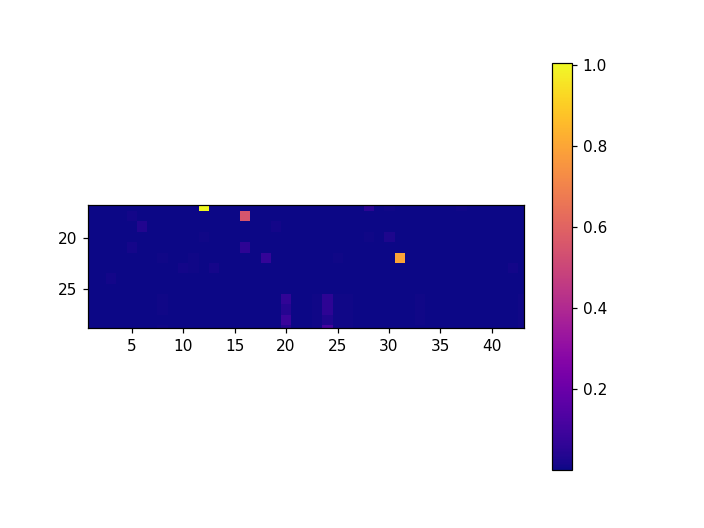

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


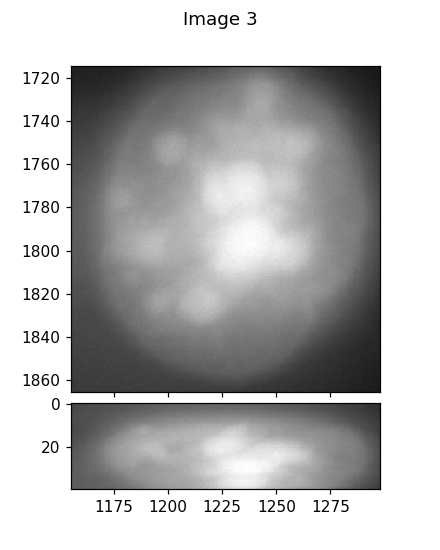

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new